# Plots

## Setup

In [1]:
import os

# Prepend TeX bin path to the PATH environment variable
os.environ['PATH'] = '/Library/TeX/texbin:' + os.environ['PATH']

In [2]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

%matplotlib inline

<function LinearScale.__init__ at 0x1070ae980>
<function LogScale.__init__ at 0x1070af420>
<function SymmetricalLogScale.__init__ at 0x1070afd80>
<function AsinhScale.__init__ at 0x1070b8540>
<function LogitScale.__init__ at 0x1070b8cc0>
<function FuncScale.__init__ at 0x1070aede0>
<function FuncScaleLog.__init__ at 0x1070af740>
<function Artist.get_agg_filter at 0x1073ecea0>
<function Artist.get_alpha at 0x1073ec680>
<function Artist.get_animated at 0x1073ec7c0>
<function Artist.get_children at 0x107397920>
<function Artist.get_clip_box at 0x1073eca40>
<function Artist.get_clip_on at 0x1073ec9a0>
<function Artist.get_clip_path at 0x1073ecae0>
<function Artist.get_cursor_data at 0x1073edc60>
<function Artist.get_figure at 0x1073ec400>
<function Artist.get_gid at 0x107397ec0>
<function Artist.get_in_layout at 0x1073ec860>
<function Artist.get_label at 0x1073ed3a0>
<function Artist.get_mouseover at 0x1073edda0>
<function Artist.get_path_effects at 0x1073ec360>
<function Artist.get_picker

In [3]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 7.00697, 7.00697
#rcParams['figure.figsize'] = 3.337, 3.337

TINY_SIZE = 5
FOOTNOTE_SIZE = 7
SMALL_SIZE = 8
NORMAL_SIZE = 9
LARGE_SIZE = 10

rcParams['font.size'] = NORMAL_SIZE


## Preprocessing

In [4]:
# load csv
import pandas as pd

df = pd.read_csv("../data/methods2test_runnable/scores.csv")

# set index as multi index based on the "model", and second level index on colum names
df["model"] = df["model"].str.split("/").str[-1]
df.set_index("model", inplace=True)

df = df.unstack().reset_index()
df.columns = ["method", "model", "codebleu"]
df.set_index(["model", "method"], inplace=True)

In [5]:
# load csv
import pandas as pd

params_df = pd.read_csv("../data/params_data.csv")
# set baseline_parameters	fine_tuning	prompt_tuning	lora	ia3  to float

params_df["model"] = params_df["model"].str.split("/").str[-1]
params_df.set_index("model", inplace=True)

params_df = params_df.unstack().reset_index()
params_df.columns = ["method", "model", "trainable_params"]
params_df.set_index(["model", "method"], inplace=True)

params_df["trainable_params"] = params_df["trainable_params"].str.replace(",", "").astype(float)


In [6]:
def add_parameters(row):

    model = row.name[0]
    method = row.name[1]
    row["trainable_params"] = params_df.loc[model, method]["trainable_params"]
    row["trainable_params_frac"] = params_df.loc[model, method]["trainable_params"] / params_df.loc[model, "pre-trained"]["trainable_params"]
    return row


df = df.apply(add_parameters, axis=1)
#df

In [115]:
df

,,codebleu,trainable_params,trainable_params_frac,codebleu_increase,codebleu_relative_increase
model,method,,,,,
starcoder2-3b,pre-trained,0.167257,3.030371e+09,1.000000,0.000000,0.000000
starcoder2-7b,pre-trained,0.174811,7.173924e+09,1.000000,0.000000,0.000000
starcoder2-15b,pre-trained,0.196950,1.565590e+10,1.000000,0.000000,0.000000
starcoderbase,pre-trained,0.174204,1.551746e+10,1.000000,0.000000,0.000000
codegen2-16B_P,pre-trained,0.302504,1.603216e+10,1.000000,0.000000,0.000000
codegen2-3_7B_P,pre-trained,0.000000,3.641174e+09,1.000000,0.000000,0.000000
codegen2-7B_P,pre-trained,0.281813,6.862858e+09,1.000000,0.000000,0.000000
codegen2-1B_P,pre-trained,0.000000,1.015306e+09,1.000000,0.000000,0.000000
codegen-350M-multi,pre-trained,0.239548,3.567124e+08,1.000000,0.000000,0.000000


In [ ]:
df["codebleu_increase"] = df.apply(lambda x: x["codebleu"] - df.loc[(x.name[0], "pre-trained")]["codebleu"], axis=1)

In [8]:
df["codebleu_relative_increase"] = df.apply(lambda x: x["codebleu_increase"] / x["trainable_params_frac"], axis=1)

In [9]:
# normalize "codebleu_relative_increase". positive values should be normalized between 0 and 1, negative values between -1 and 0

def normalize(x):
    x_tot = x["codebleu_relative_increase"]
    res_pos = x_tot
    res_tot = x_tot/x_tot.abs().sum()
    
    x_pos = x["codebleu_relative_increase"].apply(lambda x: pd.NA if x < 0 else x)
    res_pos = x_pos
    res_pos = x_pos/x_pos.sum()
    
    x_neg = x["codebleu_relative_increase"].apply(lambda x: pd.NA if x > 0 else x)
    res_neg = x_neg
    if x_neg.sum() == 0:
      res_neg = 0
    else:
      res_neg = x_neg/x_neg.sum()*(-1)

    return pd.DataFrame({"pos":res_pos, "neg":res_neg, "tot": res_tot})

df_tmp = df[df.index.get_level_values(1) != "pre-trained"]

codebleu_relative_increase_normalized = df_tmp.groupby("model") \
    .apply(normalize)\
    .droplevel(0)
df2 = pd.merge(df, codebleu_relative_increase_normalized, on=["model", "method"])

df3 = pd.merge(df, df2, on=["model", "method",'codebleu', 'trainable_params', 'trainable_params_frac',
       'codebleu_increase', 'codebleu_relative_increase'], how="left")


## Sorting

In [10]:
method_order = [ "fine-tuning", "lora", "ia3","prompt-tuning", "pre-trained"]

method_mapping = {
    "pre-trained": "Baseline",
    "fine-tuning": "Full fine-tuning",
    "lora": "LoRA",
    "ia3": "(IA)\\textsuperscript{3}",
    "prompt-tuning": "Prompt tuning",
    }

color_map = {
    "fine-tuning": "C0",
    "lora": "C1",
    "ia3": "C2",
    "prompt-tuning": "C3",
    "pre-trained": "C4",
    }

model_order = [
    "codegen-350M-multi",
    "codegen2-1B_P",
    "starcoder2-3b",
    "codegen2-3_7B_P",
    "CodeLlama-7b-hf",
    "codegen2-7B_P",
    "starcoder2-7b",
    "starcoderbase",
    "starcoder2-15b",
    "codegen2-16B_P"]

model_mapping = {
    "codegen-350M-multi": "CodeGen-350M-multi",
    "codegen2-1B_P": "CodeGen2-1B",
    "codegen2-3_7B_P": "CodeGen2-3.7B",
    "codegen2-7B_P": "CodeGen2-7B",
    "codegen2-16B_P": "CodeGen2-16B",
    "CodeLlama-7b-hf": "CodeLlama-7B",
    "starcoderbase": "StarCoderBase",
    "starcoder2-3b": "StarCoder2-3B",
    "starcoder2-7b": "StarCoder2-7B",
    "starcoder2-15b": "StarCoder2-15B"
    }


In [11]:
# Sort the data frame
sorterIndex = dict(zip(model_order, range(len(model_order))))
df3['model_rank'] = df3.index.get_level_values(0).map(sorterIndex)

sorterIndex = dict(zip(method_order, range(len(method_order))))
df3['method_rank'] = df3.index.get_level_values(1).map(sorterIndex)

df3.sort_values(['model_rank', 'method_rank'], ascending = [True, True], inplace = True)

## Figures

In [12]:
import os
os.makedirs("../figures", exist_ok=True)

In [13]:
df_tmp

,,codebleu,trainable_params,trainable_params_frac,codebleu_increase,codebleu_relative_increase
model,method,,,,,
starcoder2-3b,fine-tuning,0.297237,3.030371e+09,1.000000,0.129980,0.129980
starcoder2-7b,fine-tuning,0.310336,7.173924e+09,1.000000,0.135525,0.135525
starcoder2-15b,fine-tuning,0.340324,1.565590e+10,1.000000,0.143374,0.143374
starcoderbase,fine-tuning,0.341522,1.551746e+10,1.000000,0.167318,0.167318
codegen2-16B_P,fine-tuning,0.331460,1.603216e+10,1.000000,0.028956,0.028956
codegen2-3_7B_P,fine-tuning,0.105122,3.641174e+09,1.000000,0.105122,0.105122
codegen2-7B_P,fine-tuning,0.306235,6.862858e+09,1.000000,0.024422,0.024422
codegen2-1B_P,fine-tuning,0.148252,1.015306e+09,1.000000,0.148252,0.148252
codegen-350M-multi,fine-tuning,0.301233,3.567124e+08,1.000000,0.061684,0.061684


In [18]:
df_tmp.unstack(level=1)["tot"].fillna(0.0)\
      .sort_index(key=lambda x: x.map({v: i for i, v in enumerate(model_order)}))
      

method,lora,ia3,prompt-tuning
model,,,
codegen-350M-multi,0.029066,-0.045988,-0.924559
codegen2-1B_P,0.002354,0.151621,0.846006
starcoder2-3b,0.085048,0.660067,0.254773
codegen2-3_7B_P,0.007962,0.000000,0.992029
CodeLlama-7b-hf,0.015538,-0.045022,-0.939439
codegen2-7B_P,0.093174,0.100413,-0.806327
starcoder2-7b,0.009856,0.098443,0.891691
starcoderbase,0.000000,0.000000,0.999877
starcoder2-15b,0.010560,0.000000,0.989432


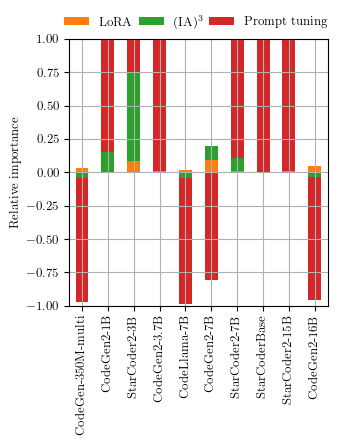

In [ ]:
# Figure 3
df_tmp = df3[df3.index.get_level_values(1) != "pre-trained"]
df_tmp = df_tmp[df_tmp.index.get_level_values(1) != "fine-tuning"]

fig, ax = plt.subplots(figsize=(7.00697, 7.00697))

method_colors = [color_map[name] for name in method_order if name not in ["pre-trained", "fine-tuning"]]
df_tmp.unstack(level=1)["tot"].fillna(0.0)\
      .sort_index(key=lambda x: x.map({v: i for i, v in enumerate(model_order)}))\
      .plot( kind='bar', stacked=True, ax=ax, legend=True, color=method_colors)

handles, labels = ax.get_legend_handles_labels()
dict_legends = dict(zip(labels, handles))
handles_order =[dict_legends[lo] for lo in method_order if lo not in ["pre-trained", "fine-tuning"]]
method_names = [method_mapping[name] for name in method_order if name not in ["pre-trained", "fine-tuning"]]
ax.legend(handles_order, method_names, mode=None, bbox_to_anchor=(0,1.02,1.02,0.2), loc="lower right", borderaxespad=0, ncol=3, frameon=False, columnspacing=0.5)

model_names = [model_mapping[item.get_text()] for item in ax.get_xticklabels()]
ax.set_xticklabels(model_names, rotation=90, ha='center', rotation_mode='default')
ax.set_ylabel('Relative importance')
ax.set_xlabel('Models')
ax.xaxis.label.set_visible(False)
ax.grid(True)
ax.set_ylim(bottom=-1, top=1)

# Show and save the plot
fig.set_size_inches(w=3.3374, h=(8.66367/2)*0.8)
plt.show()
fig.tight_layout()
fig.savefig('../figures/relative_importance.pdf', bbox_inches='tight')

ax.xaxis.set_tick_params(pad=-5)
fig.savefig('../figures/relative_importance.pgf', bbox_inches='tight')


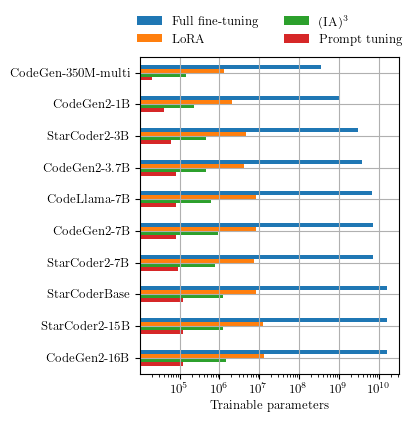

In [14]:
# Figure 2

df_tmp = df3[df3.index.get_level_values(1) != "pre-trained"]

fig, ax = plt.subplots(figsize=(7.00697, 7.00697))

method_colors = [color_map[name] for name in method_order]
df_tmp.unstack(level=1)["trainable_params"].fillna(0.0)\
      .sort_index(key=lambda x: x.map({v: i for i, v in enumerate(model_order)}))\
      .plot( kind='barh', stacked=False, ax=ax, legend=True, color = method_colors)

handles, labels = ax.get_legend_handles_labels()
dict_legends = dict(zip(labels, handles))
handles_order =[dict_legends[lo] for lo in method_order if lo != "pre-trained"]
method_names = [method_mapping[name] for name in method_order if name != "pre-trained"]
ax.legend(handles_order, method_names, bbox_to_anchor=(0,1.02,1,0.2), loc="lower center", mode=None, borderaxespad=0, ncol=2, frameon=False)

model_names = [model_mapping[item.get_text()] for item in ax.get_yticklabels()]
ax.set_yticklabels(model_names, rotation=0, ha='right')
ax.set_xlabel('Trainable parameters')
ax.set_ylabel('Model')
ax.yaxis.label.set_visible(False)
ax.grid(True)
ax.set_xscale('log')

plt.gca().invert_yaxis()

# Show and save the plot
fig.set_size_inches(w=3.3374, h=(8.66367/2)*0.95)
plt.show()
fig.tight_layout()
fig.savefig('../figures/parameters.pdf', bbox_inches='tight')

ax.yaxis.set_tick_params(pad=-5)
fig.savefig('../figures/parameters.pgf', bbox_inches='tight')




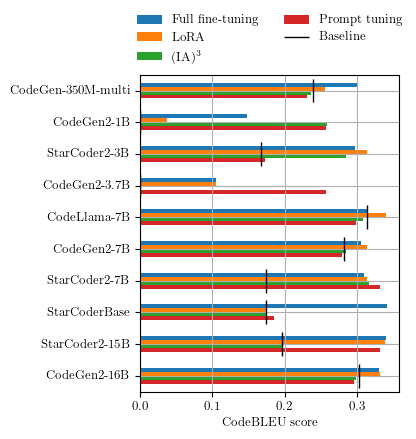

In [15]:
# Figure 4

import numpy as np
df_tmp = df3[df3.index.get_level_values(1) != "pre-trained"]

fig, ax = plt.subplots(figsize=(7.00697, 7.00697))

method_colors = [color_map[name] for name in method_order]
df_tmp.unstack(level=1)["codebleu"].fillna(0.0)\
      .sort_index(key=lambda x: x.map({v: i for i, v in enumerate(model_order)}))\
      .plot( kind='barh', stacked=False, ax=ax, legend=True, color = method_colors)

x = np.arange(len(df_tmp.columns))
baselines= df3.unstack(level=1)["codebleu"].fillna(0.0)\
      .sort_index(key=lambda x: x.map({v: i for i, v in enumerate(model_order)}))["pre-trained"]
width = 0.75
ax.vlines(baselines, x - width/2, x + width/2, color="black", label="pre-trained", linewidth=1)

handles, labels = ax.get_legend_handles_labels()
dict_legends = dict(zip(labels, handles))
handles_order =[dict_legends[lo] for lo in method_order]
method_names = [method_mapping[name] for name in method_order]
ax.legend(handles_order, method_names, bbox_to_anchor=(0,1.02,1,0.2), loc="lower center", mode=None, borderaxespad=0, ncol=2, frameon=False)

model_names = [model_mapping[item.get_text()] for item in ax.get_yticklabels()]
ax.set_yticklabels(model_names,  rotation=0, ha='right', rotation_mode='default')
ax.set_xlabel('CodeBLEU score')
ax.set_ylabel('Model')
ax.yaxis.label.set_visible(False)
ax.grid(True)

plt.gca().invert_yaxis()

# Show and save the plot
fig.set_size_inches(w=3.3374, h=(8.66367/2)*0.95)
plt.show()
fig.tight_layout()
fig.savefig('../figures/codebleu.pdf', bbox_inches='tight')
ax.yaxis.set_tick_params(pad=-5)
fig.savefig('../figures/codebleu.pgf', bbox_inches='tight')


In [16]:
df3

codebleu  trainable_params  \
model              method                                      
codegen-350M-multi fine-tuning    0.301233      3.567124e+08   
                   lora           0.256581      1.310720e+06   
                   ia3            0.236601      1.433600e+05   
                   prompt-tuning  0.231083      2.048000e+04   
                   pre-trained    0.239548      3.567124e+08   
codegen2-1B_P      fine-tuning    0.148252      1.015306e+09   
                   lora           0.036655      2.097152e+06   
                   ia3            0.258252      2.293760e+05   
                   prompt-tuning  0.257318      4.096000e+04   
                   pre-trained    0.000000      1.015306e+09   
starcoder2-3b      fine-tuning    0.297237      3.030371e+09   
                   lora           0.314870      4.546560e+06   
                   ia3            0.285304      4.684800e+05   
                   prompt-tuning  0.173232      6.144000e+04   
                   pre-trained    0.167257      3.030371e+09   
codegen2-3_7B_P    fine-tuning    0.105122      3.641174e+09   
                   lora           0.105514      4.194304e+06   
                   ia3            0.000000      4.587520e+05   
                   prompt-tuning  0.256773      8.192000e+04   
                   pre-trained    0.000000      3.641174e+09   
CodeLlama-7b-hf    fine-tuning    0.315758      6.738547e+09   
                   lora           0.340391      8.388608e+06   
                   ia3            0.308353      6.144000e+05   
                   prompt-tuning  0.298358      8.192000e+04   
                   pre-trained    0.313962      6.738547e+09   
codegen2-7B_P      fine-tuning    0.306235      6.862858e+09   
                   lora           0.314688      8.388608e+06   
                   ia3            0.285688      9.175040e+05   
                   prompt-tuning  0.279035      8.192000e+04   
                   pre-trained    0.281813      6.862858e+09   
starcoder2-7b      fine-tuning    0.310336      7.173924e+09   
                   lora           0.313610      7.340032e+06   
                   ia3            0.317155      7.536640e+05   
                   prompt-tuning  0.332475      9.216000e+04   
                   pre-trained    0.174811      7.173924e+09   
starcoderbase      fine-tuning    0.341522      1.551746e+10   
                   lora           0.174204      8.028160e+06   
                   ia3            0.174204      1.239040e+06   
                   prompt-tuning  0.185016      1.228800e+05   
                   pre-trained    0.174204      1.551746e+10   
starcoder2-15b     fine-tuning    0.340324      1.565590e+10   
                   lora           0.339722      1.212416e+07   
                   ia3            0.196950      1.249280e+06   
                   prompt-tuning  0.332536      1.228800e+05   
                   pre-trained    0.196950      1.565590e+10   
codegen2-16B_P     fine-tuning    0.331460      1.603216e+10   
                   lora           0.332095      1.336934e+07   
                   ia3            0.299685      1.462272e+06   
                   prompt-tuning  0.296844      1.228800e+05   
                   pre-trained    0.302504      1.603216e+10   

                                  trainable_params_frac  codebleu_increase  \
model              method                                                    
codegen-350M-multi fine-tuning                 1.000000           0.061684   
                   lora                        0.003674           0.017032   
                   ia3                         0.000402          -0.002948   
                   prompt-tuning               0.000057          -0.008465   
                   pre-trained                 1.000000           0.000000   
codegen2-1B_P      fine-tuning                 1.000000           0.148252   
                   lora                        0.002066           0.036655   
   

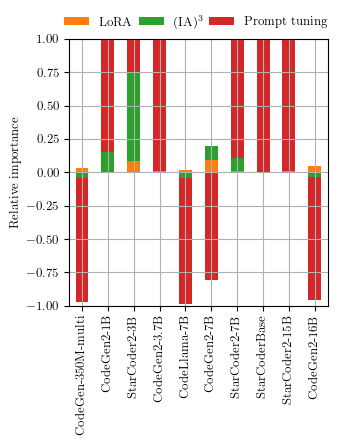

In [ ]:
# Figure 3

df_tmp = df3[df3.index.get_level_values(1) != "pre-trained"]
df_tmp = df_tmp[df_tmp.index.get_level_values(1) != "fine-tuning"]

fig, ax = plt.subplots(figsize=(7.00697, 7.00697))

method_colors = [color_map[name] for name in method_order if name not in ["pre-trained", "fine-tuning"]]
df_tmp.unstack(level=1)["tot"].fillna(0.0)\
      .sort_index(key=lambda x: x.map({v: i for i, v in enumerate(model_order)}))\
      .plot( kind='bar', stacked=True, ax=ax, legend=True, color=method_colors)

handles, labels = ax.get_legend_handles_labels()
dict_legends = dict(zip(labels, handles))
handles_order =[dict_legends[lo] for lo in method_order if lo not in ["pre-trained", "fine-tuning"]]
method_names = [method_mapping[name] for name in method_order if name not in ["pre-trained", "fine-tuning"]]
ax.legend(handles_order, method_names, mode=None, bbox_to_anchor=(0,1.02,1.02,0.2), loc="lower right", borderaxespad=0, ncol=3, frameon=False, columnspacing=0.5)

model_names = [model_mapping[item.get_text()] for item in ax.get_xticklabels()]
ax.set_xticklabels(model_names, rotation=90, ha='center', rotation_mode='default')
ax.set_ylabel('Relative importance')
ax.set_xlabel('Models')
ax.xaxis.label.set_visible(False)
ax.grid(True)
ax.set_ylim(bottom=-1, top=1)

# Show and save the plot
fig.set_size_inches(w=3.3374, h=(8.66367/2)*0.8)
plt.show()
fig.tight_layout()
fig.savefig('../figures/relative_importance.pdf', bbox_inches='tight')

ax.xaxis.set_tick_params(pad=-5)
fig.savefig('../figures/relative_importance.pgf', bbox_inches='tight')


(-1.0, 1.0)

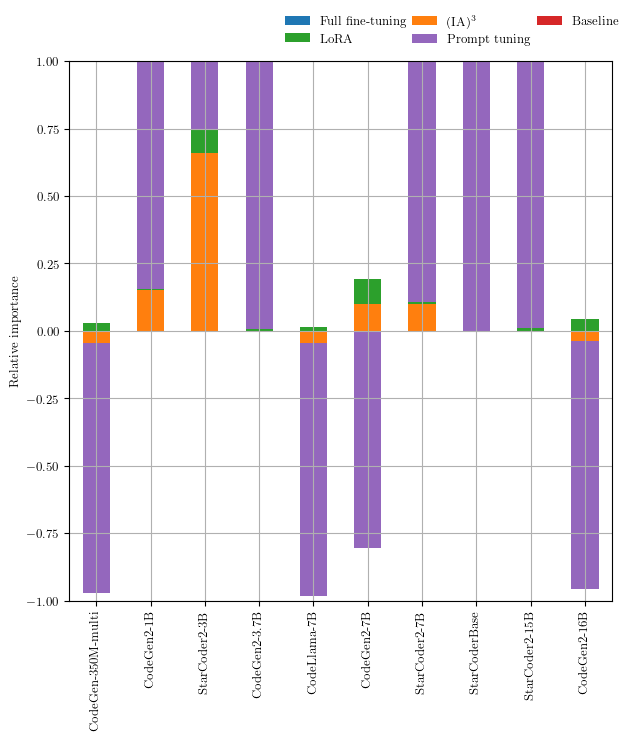

In [18]:
df_tmp = df3

fig, ax = plt.subplots(figsize=(7.00697, 7.00697))

method_colors = [color_map[name] for name in method_order]
df_tmp.unstack(level=1)["tot"].fillna(0.0)\
      .sort_index(key=lambda x: x.map({v: i for i, v in enumerate(model_order)}))\
      .plot( kind='bar', stacked=True, ax=ax, legend=True, color=method_colors)

handles, labels = ax.get_legend_handles_labels()
dict_legends = dict(zip(labels, handles))
handles_order =[dict_legends[lo] for lo in method_order]
method_names = [method_mapping[name] for name in method_order]
ax.legend(handles_order, method_names, mode=None, bbox_to_anchor=(0,1.02,1.02,0.2), loc="lower right", borderaxespad=0, ncol=3, frameon=False, columnspacing=0.5)

model_names = [model_mapping[item.get_text()] for item in ax.get_xticklabels()]
ax.set_xticklabels(model_names, rotation=90, ha='center', rotation_mode='default')
ax.set_ylabel('Relative importance')
ax.set_xlabel('Models')
ax.xaxis.label.set_visible(False)
ax.grid(True)
ax.set_ylim(bottom=-1, top=1)


In [19]:
import pandas as pd
import numpy as np
from pathlib import Path

DATA_DIR = Path('../data/')

In [20]:
models = {
    'codegen-350M-multi': 'CodeGen-350M-multi',
    'codegen2-1B_P': 'CodeGen2-1B',
    'starcoder2-3b': 'StarCoder2-3B',
    'codegen2-3_7B_P': 'CodeGen2-3.7B',
    'CodeLlama-7b-hf': 'CodeLlama-7B',
    'codegen2-7B_P': 'CodeGen2-7B',
    'starcoder2-7b': 'StarCoder2-7B',
    'starcoderbase': 'StarCoderBase',
    'starcoder2-15b': 'StarCoder2-15B',
    'codegen2-16B_P': 'CodeGen2-16B',
}

#datasets = ['methods2test_runnable', 'humaneval-x']
datasets = {
    'methods2test_runnable': '\\textsc{Methods2Test\\textsubscript{runnable}}',
    'humaneval-x': '\\textsc{HumanEval-X\\textsubscript{java}}',
}

columns = ['valid_syntax', 'scores', 'coverage_runnable', 'coverage_instruction', 'coverage_branch']

methods = {
    'pre-trained': 'None',
    'fine-tuning': 'Fine-tuning',
    'lora': 'LoRA',
    'ia3': '(IA)\\textsuperscript{3}',
    'prompt-tuning': 'Prompt tuning',
}

In [21]:
#CodeGen2-3.7B LoRA ValidSyntax
#CodeGen2-1B Prompt tuning ValidSyntax

In [22]:
notable_results = [
    ('methods2test_runnable', 'codegen2-1B_P', 'prompt-tuning', 'valid_syntax'),
    ('methods2test_runnable', 'codegen2-3_7B_P', 'LoRA', 'valid_syntax')
]

In [107]:
model_trainable_params =  pd.read_csv(DATA_DIR / 'params_data.csv', index_col=0)
model_trainable_params.index = model_trainable_params.index.str.split('/').str[1]
model_trainable_params = model_trainable_params.loc[models.keys()]
#model_trainable_params["pre-trained"] = '0'
# set datatype of trainable_params to int
#first remove commas from the trainable_params column
model_trainable_params = model_trainable_params.apply(lambda x: x.str.replace(',', ''))
model_trainable_params = model_trainable_params.astype(int)
model_trainable_params

,pre-trained,fine-tuning,prompt-tuning,lora,ia3
model,,,,,
codegen-350M-multi,356712448,356712448,20480,1310720,143360
codegen2-1B_P,1015306240,1015306240,40960,2097152,229376
starcoder2-3b,3030371328,3030371328,61440,4546560,468480
codegen2-3_7B_P,3641174016,3641174016,81920,4194304,458752
CodeLlama-7b-hf,6738546688,6738546688,81920,8388608,614400
codegen2-7B_P,6862858240,6862858240,81920,8388608,917504
starcoder2-7b,7173923840,7173923840,92160,7340032,753664
starcoderbase,15517456384,15517456384,122880,8028160,1239040
starcoder2-15b,15655899136,15655899136,122880,12124160,1249280


In [24]:

data = {}

for dataset in datasets.keys():
    dataset_dir = DATA_DIR / dataset
    
    coverage_branch = pd.read_csv(dataset_dir / 'coverage_branch.csv', index_col=0)
    coverage_branch.index = coverage_branch.index.str.split('/').str[1]
    coverage_branch = coverage_branch.loc[models.keys()]
    
    coverage_instruction = pd.read_csv(dataset_dir / 'coverage_instruction.csv', index_col=0)
    coverage_instruction.index = coverage_instruction.index.str.split('/').str[1]
    coverage_instruction = coverage_instruction.loc[models.keys()]
    
    coverage_runnable = pd.read_csv(dataset_dir / 'coverage_runnable.csv', index_col=0)
    coverage_runnable.index = coverage_runnable.index.str.split('/').str[1]
    coverage_runnable = coverage_runnable.loc[models.keys()]
    
    
    scores = pd.read_csv(dataset_dir / 'scores.csv', index_col=0)
    scores.index = scores.index.str.split('/').str[1]
    scores = scores.loc[models.keys()]
    
    valid_syntax = pd.read_csv(dataset_dir / 'valid_syntax.csv', index_col=0)
    valid_syntax.index = valid_syntax.index.str.split('/').str[1]
    valid_syntax = valid_syntax.loc[models.keys()]
    
    data[dataset] = pd.concat([valid_syntax, scores, coverage_runnable, coverage_instruction, coverage_branch], axis=1, keys=columns)
    

#concat all datasets
data = pd.concat(data, axis=1)
data = data.astype(float).round(2)
data


methods2test_runnable                                  \
                            valid_syntax                                   
                                    lora   ia3 prompt-tuning pre-trained   
model                                                                      
codegen-350M-multi                  0.96  0.95          0.96        0.96   
codegen2-1B_P                       0.38  0.02          0.70        0.00   
starcoder2-3b                       0.98  0.94          0.93        0.93   
codegen2-3_7B_P                     0.42  0.00          0.22        0.00   
CodeLlama-7b-hf                     0.98  0.98          0.97        0.98   
codegen2-7B_P                       0.99  0.98          0.98        0.99   
starcoder2-7b                       0.97  0.95          0.93        0.92   
starcoderbase                       0.92  0.92          0.91        0.92   
starcoder2-15b                      0.98  0.93          0.98        0.93   
codegen2-16B_P                      0.99  0.98          0.98        0.98   

                                                                            \
                                    scores                                   
                   fine-tuning pre-trained fine-tuning   ia3 prompt-tuning   
model                                                                        
codegen-350M-multi        0.98        0.24        0.30  0.24          0.23   
codegen2-1B_P             0.75        0.00        0.15  0.26          0.26   
starcoder2-3b             0.96        0.17        0.30  0.29          0.17   
codegen2-3_7B_P           0.41        0.00        0.11  0.00          0.26   
CodeLlama-7b-hf           0.98        0.31        0.32  0.31          0.30   
codegen2-7B_P             0.98        0.28        0.31  0.29          0.28   
starcoder2-7b             0.97        0.17        0.31  0.32          0.33   
starcoderbase             0.97        0.17        0.34  0.17          0.19   
starcoder2-15b            0.98        0.20        0.34  0.20          0.33   
codegen2-16B_P            0.99        0.30        0.33  0.30          0.30   

                          ...          humaneval-x                    \
                          ... coverage_instruction                     
                    lora  ...          pre-trained fine-tuning   ia3   
model                     ...                                          
codegen-350M-multi  0.26  ...                 0.97        1.00  0.99   
codegen2-1B_P       0.04  ...                 0.00        0.00  0.00   
starcoder2-3b       0.31  ...                 0.99        0.99  0.99   
codegen2-3_7B_P     0.11  ...                 0.00        0.00  0.00   
CodeLlama-7b-hf     0.34  ...                 0.98        0.99  0.99   
codegen2-7B_P       0.31  ...                 0.98        1.00  0.98   
starcoder2-7b       0.31  ...                 0.99        0.99  0.99   
starcoderbase       0.17  ...                 0.99        0.99  0.99   
starcoder2-15b      0.34  ...                 0.99        1.00  0.99   
codegen2-16B_P      0.33  ...                 0.99        1.00  0.99   

                                                                          \
                                       coverage_branch                     
                   prompt-tuning  lora     pre-trained fine-tuning   ia3   
model                                                                      
codegen-350M-multi          0.98  0.97            0.90        0.83  0.94   
codegen2-1B_P               0.00  0.00            0.00        0.00  0.00   
starcoder2-3b               1.00  1.00            0.85        0.85  0.83   
codegen2-3_7B_P             0.00  0.00            0.00        0.00  0.00   
CodeLlama-7b-hf             0.98  1.00            0.84        0.86  0.85   
codegen2-7B_P               0.99  0.99            0.81        0.70  0.80   
starcoder2-7b               0.99  0.99            0.83        0.90  0.88   
starcoderbase   

In [181]:
data["methods2test_runnable"].keys()

MultiIndex([(        'valid_syntax',          'lora'),
            (        'valid_syntax',           'ia3'),
            (        'valid_syntax', 'prompt-tuning'),
            (        'valid_syntax',   'pre-trained'),
            (        'valid_syntax',   'fine-tuning'),
            (              'scores',   'pre-trained'),
            (              'scores',   'fine-tuning'),
            (              'scores',           'ia3'),
            (              'scores', 'prompt-tuning'),
            (              'scores',          'lora'),
            (   'coverage_runnable',   'pre-trained'),
            (   'coverage_runnable',   'fine-tuning'),
            (   'coverage_runnable',           'ia3'),
            (   'coverage_runnable', 'prompt-tuning'),
            (   'coverage_runnable',          'lora'),
            ('coverage_instruction',   'pre-trained'),
            ('coverage_instruction',   'fine-tuning'),
            ('coverage_instruction',           'ia3'),
          

In [179]:
data["methods2test_runnable"]

valid_syntax                                              \
                           lora   ia3 prompt-tuning pre-trained fine-tuning   
model                                                                         
codegen-350M-multi         0.96  0.95          0.96        0.96        0.98   
codegen2-1B_P              0.38  0.02          0.70        0.00        0.75   
starcoder2-3b              0.98  0.94          0.93        0.93        0.96   
codegen2-3_7B_P            0.42  0.00          0.22        0.00        0.41   
CodeLlama-7b-hf            0.98  0.98          0.97        0.98        0.98   
codegen2-7B_P              0.99  0.98          0.98        0.99        0.98   
starcoder2-7b              0.97  0.95          0.93        0.92        0.97   
starcoderbase              0.92  0.92          0.91        0.92        0.97   
starcoder2-15b             0.98  0.93          0.98        0.93        0.98   
codegen2-16B_P             0.99  0.98          0.98        0.98        0.99   

                        scores                                        ...  \
                   pre-trained fine-tuning   ia3 prompt-tuning  lora  ...   
model                                                                 ...   
codegen-350M-multi        0.24        0.30  0.24          0.23  0.26  ...   
codegen2-1B_P             0.00        0.15  0.26          0.26  0.04  ...   
starcoder2-3b             0.17        0.30  0.29          0.17  0.31  ...   
codegen2-3_7B_P           0.00        0.11  0.00          0.26  0.11  ...   
CodeLlama-7b-hf           0.31        0.32  0.31          0.30  0.34  ...   
codegen2-7B_P             0.28        0.31  0.29          0.28  0.31  ...   
starcoder2-7b             0.17        0.31  0.32          0.33  0.31  ...   
starcoderbase             0.17        0.34  0.17          0.19  0.17  ...   
starcoder2-15b            0.20        0.34  0.20          0.33  0.34  ...   
codegen2-16B_P            0.30        0.33  0.30          0.30  0.33  ...   

                   coverage_instruction                                        \
                            pre-trained fine-tuning   ia3 prompt-tuning  lora   
model                                                                           
codegen-350M-multi                 0.49        0.45  0.49          0.41  0.41   
codegen2-1B_P                      0.00        0.06  0.00          0.00  0.01   
starcoder2-3b                      0.13        0.52  0.39          0.11  0.54   
codegen2-3_7B_P                    0.00        0.00  0.00          0.00  0.06   
CodeLlama-7b-hf                    0.55        0.57  0.57          0.58  0.58   
codegen2-7B_P                      0.54        0.59  0.57          0.52  0.59   
starcoder2-7b                      0.10        0.55  0.60          0.49  0.53   
starcoderbase                      0.15        0.55  0.15          0.18  0.14   
starcoder2-15b                     0.16        0.48  0.16          0.55  0.55   
codegen2-16B_P                     0.54        0.45  0.55          0.55  0.48   

                   coverage_branch                                        
                       pre-trained fine-tuning   ia3 prompt-tuning  lora  
model                                                                     
codegen-350M-multi            0.12        0.15  0.14          0.13  0.14  
codegen2-1B_P                 0.00        0.00  0.00          0.00  0.00  
starcoder2-3b                 0.06        0.18  0.13          0.05  0.18  
codegen2-3_7B_P               0.00        0.00  0.00          0.00  0.03  
CodeLlama-7b-hf               0.23        0.22  0.24          0.22  0.23  
codegen2-7B_P                 0.21        0.26  0.22          0.20  0.22  
starcoder2-7b                 0.05        0.20  0.22          0.16  0.19  
starcoderbase                 0.06        0.21  0.06          0.08  0.06  
starcoder2-15b                0.07        0.18  0.06          0.21  0.23  
codegen2-16B_P                0.20 

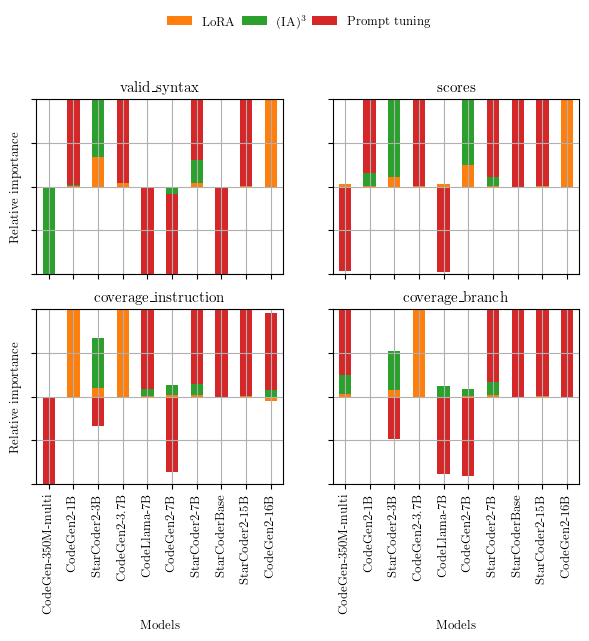

In [229]:
# Figure 3
fig, axs = plt.subplots(2, 2, figsize=(7.00697, 7.00697), sharex=True, sharey=True)
axs = axs.flatten()  # To index subplots in a flat list

method_colors = [color_map[name] for name in method_order if name not in ["pre-trained", "fine-tuning"]]
handles_order =[dict_legends[lo] for lo in method_order if lo not in ["pre-trained", "fine-tuning"]]
method_names = [method_mapping[name] for name in method_order if name not in ["pre-trained", "fine-tuning"]]
for idx, metric in enumerate(["valid_syntax", "scores", "coverage_instruction", "coverage_branch"]):
      
      trainable_params_frac_df = model_trainable_params.div(model_trainable_params["pre-trained"],axis=0)
      increase_df = data["methods2test_runnable"][metric].sub(data["methods2test_runnable"][metric]["pre-trained"],axis=0)
      relative_increase_df = increase_df.div(trainable_params_frac_df, axis=0)
      relative_increase_normalized = relative_increase_df.div(relative_increase_df.abs().sum(axis=1), axis=0)  

      ax = axs[idx]

      relative_increase_normalized[["lora", "ia3", "prompt-tuning"]].sort_index(key=lambda x: x.map({v: i for i, v in enumerate(model_order)}))\
            .plot( kind='bar', stacked=True, ax=ax, legend=False, color=method_colors)

      if idx // 2 == 1:  # bottom row indices: 2 and 3 (for 2x2 grid)
            model_names = [model_mapping[item.get_text()] for item in ax.get_xticklabels()]
            ax.set_xticklabels(model_names, rotation=90, ha='center')
            ax.set_xlabel('Models')
      else:
            ax.set_xticklabels([])  # hide x labels for top row

    
 #     model_names = [model_mapping[item.get_text()] for item in ax.get_xticklabels()]
#      ax.set_xticklabels(model_names, rotation=90, ha='center', rotation_mode='default')
       # Y-axis labels only for left column (idx 0 and 2)
      if idx % 2 == 0:
            ax.set_ylabel('Relative importance')
      else:
            ax.set_ylabel('')
            ax.set_yticklabels([])
      ax.grid(True)
      ax.set_ylim(bottom=-1, top=1)
      ax.set_title(metric)
# Show and save the plot
fig.legend(handles_order, method_names, loc='lower center', ncol=3, frameon=False, columnspacing=0.5, bbox_to_anchor=(0.5,1.0))

fig.set_size_inches(w=7.00697, h=(5))
plt.show()
fig.tight_layout()
fig.savefig('../figures/relative_importance.pdf', bbox_inches='tight')
ax.xaxis.set_tick_params(pad=-5)
fig.savefig('../figures/relative_importance.pgf', bbox_inches='tight')


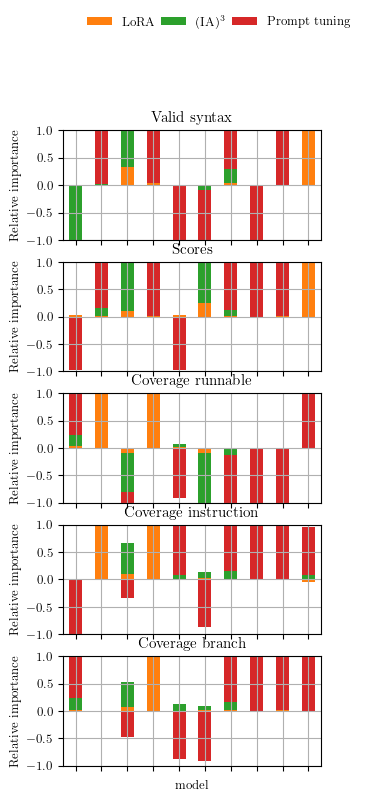

In [ ]:
# Figure 3
fig, axs = plt.subplots(5, 1, figsize=(7.00697, 7.00697), sharex=True, sharey=True)
axs = axs.flatten()  # To index subplots in a flat list

method_colors = [color_map[name] for name in method_order if name not in ["pre-trained", "fine-tuning"]]
handles_order =[dict_legends[lo] for lo in method_order if lo not in ["pre-trained", "fine-tuning"]]
method_names = [method_mapping[name] for name in method_order if name not in ["pre-trained", "fine-tuning"]]
for idx, metric in enumerate(["valid_syntax", "scores", "coverage_runnable", "coverage_instruction", "coverage_branch"]):
      temp_data = data.drop(index="codegen2-1B_P").drop(index="codegen2-3_7B_P")

      trainable_params_frac_df = model_trainable_params.div(model_trainable_params["pre-trained"],axis=0)
      increase_df = temp_data["methods2test_runnable"][metric].sub(temp_data["methods2test_runnable"][metric]["pre-trained"],axis=0)
      relative_increase_df = increase_df.div(trainable_params_frac_df, axis=0)
      relative_increase_normalized = relative_increase_df.div(relative_increase_df.abs().sum(axis=1), axis=0)  

      ax = axs[idx]

      relative_increase_normalized[["lora", "ia3", "prompt-tuning"]].sort_index(key=lambda x: x.map({v: i for i, v in enumerate(model_order)}))\
            .plot( kind='bar', stacked=True, ax=ax, legend=False, color=method_colors)

      if idx // 2 == 1:  # bottom row indices: 2 and 3 (for 2x2 grid)
            model_names = [model_mapping[item.get_text()] for item in ax.get_xticklabels()]
            
            ax.set_xticklabels(model_names, rotation=90, ha='center')
            ax.set_xlabel('Models')
      else:
            ax.set_xticklabels([])  # hide x labels for top row

    
 #     model_names = [model_mapping[item.get_text()] for item in ax.get_xticklabels()]
#      ax.set_xticklabels(model_names, rotation=90, ha='center', rotation_mode='default')
       # Y-axis labels only for left column (idx 0 and 2)
      ax.set_ylabel('Relative importance')
      ax.grid(True)
      ax.set_ylim(bottom=-1, top=1)
      ax.set_title(metric.replace('_', ' ').capitalize())
# Show and save the plot
fig.legend(handles_order, method_names, loc='lower right', ncol=3, frameon=False, columnspacing=0.5, bbox_to_anchor=(0,0.99,1.02,0.2))
#fig.supylabel("Relative importance", fontsize=12)
fig.set_size_inches(w=3.3374, h=(8.25))
plt.show()
fig.tight_layout()
fig.savefig('../figures/relative_importance.pdf', bbox_inches='tight')
ax.xaxis.set_tick_params(pad=-2.5)
fig.savefig('../figures/relative_importance.pgf', bbox_inches='tight')


In [ ]:
data["methods2test_runnable"]["scores"]



params_df = params_df.unstack().reset_index()
params_df.columns = ["method", "model", "trainable_params"]


,fine-tuning,ia3,lora,pre-trained,prompt-tuning
model,,,,,
codegen-350M-multi,NaN,0.0,0.0,NaN,0.0
codegen2-1B_P,NaN,0.0,0.0,NaN,0.0
starcoder2-3b,NaN,0.0,0.0,NaN,0.0
codegen2-3_7B_P,NaN,0.0,0.0,NaN,0.0
CodeLlama-7b-hf,NaN,0.0,0.0,NaN,0.0
codegen2-7B_P,NaN,0.0,0.0,NaN,0.0
starcoder2-7b,NaN,0.0,0.0,NaN,0.0
starcoderbase,NaN,0.0,0.0,NaN,0.0
starcoder2-15b,NaN,0.0,0.0,NaN,0.0


In [ ]:
params_df.set_index(["model", "method"], inplace=True)

params_df["trainable_params"] = params_df["trainable_params"].str.replace(",", "").astype(float)


In [ ]:
df["codebleu_increase"] = df.apply(lambda x: x["codebleu"] - df.loc[(x.name[0], "pre-trained")]["codebleu"], axis=1)

In [ ]:
df["codebleu_relative_increase"] = df.apply(lambda x: x["codebleu_increase"] / x["trainable_params_frac"], axis=1)

In [ ]:
import seaborn as sns

x = data["methods2test_runnable"]["scores"]
y = data["methods2test_runnable"]["coverage_instruction"]
z = data["methods2test_runnable"]["coverage_branch"]



x_1 = x.to_numpy().reshape(1, -1)[0]
y_1 = y.to_numpy().reshape(1, -1)[0]
z_1 = z.to_numpy().reshape(1, -1)[0]
# Plot
fig, ax = plt.subplots(figsize=(7.00697, 7.00697))
#plt.plot(df.columns, df.loc['scores'], marker='o', label='Scores')
#plt.plot(df.columns, df.loc['coverage_instruction'], marker='s', label='Coverage (Instruction)')
#ax.scatter(x, y, marker='o', linestyle='', color='C0', label='Coverage (Instruction)')
#ax.scatter(x, z, marker='o', linestyle='', color='C1', label='Coverage (Branch)')

# make dots smaller
# change dot to x
sns.regplot(x=x_1, y=y_1, scatter=True, color='C0', label='Instruction Coverage', line_kws={'linestyle': '-'}, truncate=False, scatter_kws={'s': 20, 'marker': 'o'})
sns.regplot(x=x_1, y=z_1, scatter=True, color='C1', marker="^", label='Branch Coverage', line_kws={'linestyle': '-'}, truncate=False, scatter_kws={'s': 20, 'marker': 'x'})


ax.set_xlabel('CodeBLEU')
ax.set_ylabel('Coverage')
ax.legend()
ax.grid(True)
ax.set_xlim(left=-0.02, right=0.35)
ax.set_ylim(bottom=-0.1, top=0.6)

#ax.legend(handles_order, method_names, mode=None, bbox_to_anchor=(0,1.02,1.02,0.2), loc="lower right", borderaxespad=0, ncol=3, frameon=False, columnspacing=0.5)
#set legend location to outside top
ax.legend(loc='lower right', bbox_to_anchor=(0,1.02,1.02,0.2), ncol=2, frameon=False, columnspacing=0.5)

# Show and save the plot
fig.set_size_inches(w=3.3374, h=(8.66367/2)*0.8)
plt.show()
fig.tight_layout()
fig.savefig('../figures/correlation.pdf', bbox_inches='tight')

#ax.yaxis.set_tick_params(pad=-5)
fig.savefig('../figures/correlation.pgf', bbox_inches='tight')


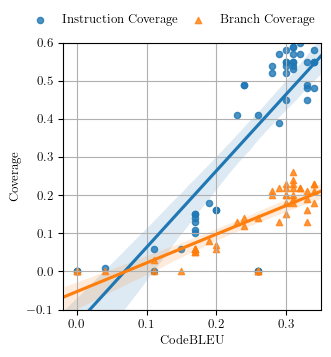

In [ ]:
import seaborn as sns

x = data["methods2test_runnable"]["scores"]
y = data["methods2test_runnable"]["coverage_instruction"]
z = data["methods2test_runnable"]["coverage_branch"]



x_1 = x.to_numpy().reshape(1, -1)[0]
y_1 = y.to_numpy().reshape(1, -1)[0]
z_1 = z.to_numpy().reshape(1, -1)[0]
# Plot
fig, ax = plt.subplots(figsize=(7.00697, 7.00697))
#plt.plot(df.columns, df.loc['scores'], marker='o', label='Scores')
#plt.plot(df.columns, df.loc['coverage_instruction'], marker='s', label='Coverage (Instruction)')
#ax.scatter(x, y, marker='o', linestyle='', color='C0', label='Coverage (Instruction)')
#ax.scatter(x, z, marker='o', linestyle='', color='C1', label='Coverage (Branch)')

# make dots smaller
# change dot to x
sns.regplot(x=x_1, y=y_1, scatter=True, color='C0', label='Instruction Coverage', line_kws={'linestyle': '-'}, truncate=False, scatter_kws={'s': 20, 'marker': 'o'})
sns.regplot(x=x_1, y=z_1, scatter=True, color='C1', marker="^", label='Branch Coverage', line_kws={'linestyle': '-'}, truncate=False, scatter_kws={'s': 20, 'marker': 'x'})


ax.set_xlabel('CodeBLEU')
ax.set_ylabel('Coverage')
ax.legend()
ax.grid(True)
ax.set_xlim(left=-0.02, right=0.35)
ax.set_ylim(bottom=-0.1, top=0.6)

#ax.legend(handles_order, method_names, mode=None, bbox_to_anchor=(0,1.02,1.02,0.2), loc="lower right", borderaxespad=0, ncol=3, frameon=False, columnspacing=0.5)
#set legend location to outside top
ax.legend(loc='lower right', bbox_to_anchor=(0,1.02,1.02,0.2), ncol=2, frameon=False, columnspacing=0.5)

# Show and save the plot
fig.set_size_inches(w=3.3374, h=(8.66367/2)*0.8)
plt.show()
fig.tight_layout()
fig.savefig('../figures/correlation.pdf', bbox_inches='tight')

#ax.yaxis.set_tick_params(pad=-5)
fig.savefig('../figures/correlation.pgf', bbox_inches='tight')


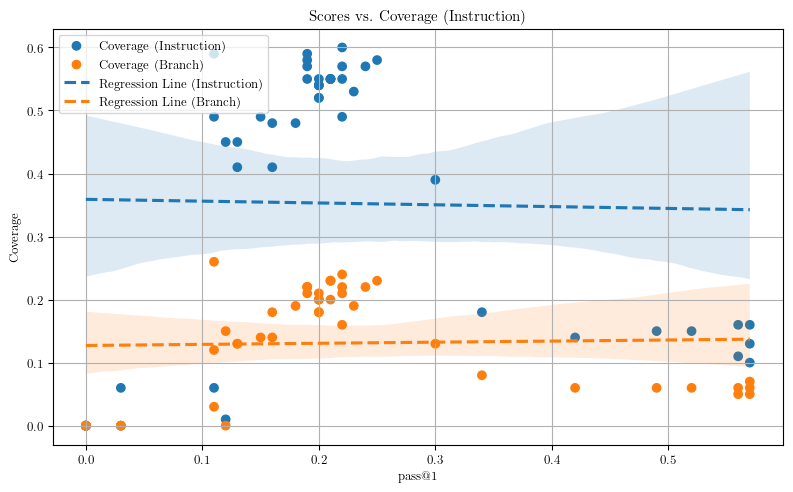

In [27]:
x = data["methods2test_runnable"]["coverage_runnable"]
y = data["methods2test_runnable"]["coverage_instruction"]
z = data["methods2test_runnable"]["coverage_branch"]



x_1 = x.to_numpy().reshape(1, -1)[0]
y_1 = y.to_numpy().reshape(1, -1)[0]
z_1 = z.to_numpy().reshape(1, -1)[0]
# Plot
plt.figure(figsize=(8, 5))
#plt.plot(df.columns, df.loc['scores'], marker='o', label='Scores')
#plt.plot(df.columns, df.loc['coverage_instruction'], marker='s', label='Coverage (Instruction)')
plt.scatter(x, y, marker='o', linestyle='', color='C0', label='Coverage (Instruction)')
plt.scatter(x, z, marker='o', linestyle='', color='C1', label='Coverage (Branch)')
sns.regplot(x=x_1, y=y_1, scatter=False, color='C0', label='Regression Line (Instruction)', line_kws={'linestyle': '--'})
sns.regplot(x=x_1, y=z_1, scatter=False, color='C1', label='Regression Line (Branch)', line_kws={'linestyle': '--'})
plt.title('Scores vs. Coverage (Instruction)')
plt.xlabel('pass@1')
plt.ylabel('Coverage')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()